# Understanding the relationships among characteristics of notable people

"Notability" is a social construct with no fixed definition.  The BHHT data contain four main attributes describing the notable people -- sex, occupation, birth era, and region.  These characteristics can be used to understand the social construction of notability in different contexts.  For example, we can consider how the joint distribution of sex and occupation varies geographically (by region) and over time.

The characteristics of notable people in the BHHT data are [nominal](https://en.wikipedia.org/wiki/Nominal_category) (except birth year, which can be recoded if desired to an ordinal "birth era" variable).  We can thus represent the data as a 4-way [contingency table](https://en.wikipedia.org/wiki/Contingency_table) (sex x occupation x birth era x region). This contingency table reflects the joint distribution of the four characteristics in the population of interest.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import prince
import matplotlib.pyplot as plt

Modify the path below to point to the data file.

In [4]:
pa = Path("/Users/jiatao/Desktop/UMich/25Fall/STATS 485/case2/")

The entire dataset is around 2.3 million rows.  You can restrict to the first million rows when exploring, then switch to the whole dataset for final analyses.

In [5]:
ca = ["birth", "death", "gender", "un_region", "level1_main_occ", "name"]
df = pd.read_csv(pa / Path("cross-verified-database.csv.gz"), usecols=ca, encoding="latin-1", nrows=1000000)

Rename the variables so that they fit better as labels on plots.

In [6]:
df = df.rename({"level1_main_occ": "occ", "gender": "sex", "un_region": "reg"}, axis=1)
df = df[["birth", "occ", "sex", "reg", "name"]].dropna()

We will focus on people who lived after 1500.

In [7]:
df = df.query("birth >= 1500")
df.head()

birth         occ     sex     reg                         name
0  1932.0     Culture    Male  Europe                 Claus_Hammel
1  1860.0     Culture    Male  Europe     Karel_MatÄj_Äapek-Chod
2  1971.0     Culture    Male  Europe            Florian_Eichinger
3  1983.0     Culture    Male  Europe                 Florian_Jahr
4  1912.0  Leadership  Female  Europe  Wiltraut_Rupp-von_BrÃ¼nneck

Remove very infrequent or difficult to interpret categories

In [8]:
df = df.loc[df.occ != "Other", :]
df = df.loc[df.occ != "Missing", :]
df = df.loc[df.sex != "Other", :]

Create a "century of birth" variable, make it a string so that it is interpreted as a nominal variable.

In [9]:
df.loc[:, "era"] = df.birth.round(-2)
df = df.drop("birth", axis=1)
df.loc[:, "era"] = ["%d" % x for x in df.era]
df.head()

/var/folders/hh/049t2rhs1hd6bl2y2zk8_j980000gn/T/ipykernel_87739/3048840127.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1900', '1900', '2000', '2000', '1900', '1900', '1800', '1900', '1900', '1900', '1900', '2000', '1900', '2000', '1900', '1900', '1900', '1900', '1900', '1900', '2000', '2000', '2000', '1900', '2000', '2000', '1900', '2000', '2000', '1900', '1900', '1900', '2000', '1800', '2000', '1900', '1900', '1900', '1900', '1900', '2000', '1900', '1900', '1700', '1900', '2000', '2000', '2000', '1600', '2000', '1900', '1900', '2000', '1700', '2000', '1900', '2000', '1800', '1900', '1900', '1900', '1800', '1900', '1900', '1900', '1900', '2000', '2000', '1900', '2000', '2000', '1900', '1900', '1900', '1900', '1900', '1900', '1900', '1900', '2000', '2000', '1900', '1900', '1900', '2000', '2000', '1900', '1900', '1700', '2000', '2000', '1900', '1900', '1800', '1900', '1900', '2000', '1900', '2000', '2000',

occ     sex     reg                         name   era
0     Culture    Male  Europe                 Claus_Hammel  1900
1     Culture    Male  Europe     Karel_MatÄj_Äapek-Chod  1900
2     Culture    Male  Europe            Florian_Eichinger  2000
3     Culture    Male  Europe                 Florian_Jahr  2000
4  Leadership  Female  Europe  Wiltraut_Rupp-von_BrÃ¼nneck  1900

We won't need the names anymore so we create a copy of the data that omits them.

In [10]:
dx = df.drop(columns=["name"])
dx

occ     sex      reg   era
0            Culture    Male   Europe  1900
1            Culture    Male   Europe  1900
2            Culture    Male   Europe  2000
3            Culture    Male   Europe  2000
4         Leadership  Female   Europe  1900
...              ...     ...      ...   ...
999995       Culture  Female   Europe  1900
999996       Culture    Male   Europe  1900
999997    Leadership  Female   Europe  1900
999998       Culture    Male  America  2000
999999  Sports/Games  Female   Europe  2000

[874051 rows x 4 columns]

We will aim to understand notability by studying the contingency table below.

In [11]:
tab = dx.groupby(["sex", "reg", "occ", "era"]).size().unstack().fillna(0)
tab

era                                 1500    1600    1700     1800     1900  \
sex    reg     occ                                                           
Female Africa  Culture               0.0     0.0     0.0      5.0    267.0   
               Discovery/Science     0.0     1.0     0.0      3.0    109.0   
               Leadership            1.0     3.0     6.0     15.0    267.0   
               Sports/Games          0.0     0.0     0.0      0.0     38.0   
       America Culture               0.0     2.0    22.0    343.0   8352.0   
               Discovery/Science     0.0     2.0     7.0    158.0   2503.0   
               Leadership            5.0     7.0    37.0    263.0   2471.0   
               Sports/Games          0.0     0.0     1.0      2.0    660.0   
       Asia    Culture               0.0     8.0     8.0     36.0   1337.0   
               Discovery/Science     0.0     0.0     0.0      3.0    331.0   
               Leadership           10.0    48.0    30.0     64.0    664.0   
               Sports/Games          0.0     1.0     0.0      0.0    207.0   
       Europe  Culture              34.0   179.0   392.0   2524.0  16814.0   
               Discovery/Science     7.0    20.0    40.0    270.0   4432.0   
               Leadership          168.0   419.0   488.0    920.0   5603.0   
               Sports/Games          0.0     3.0     1.0     21.0   2330.0   
       Oceania Culture               0.0     0.0     0.0     23.0    570.0   
               Discovery/Science     0.0     0.0     0.0     11.0    283.0   
               Leadership            0.0     0.0     0.0     40.0    268.0   
               Sports/Games          0.0     0.0     0.0      0.0    305.0   
Male   Africa  Culture               1.0     1.0     2.0     29.0    959.0   
               Discovery/Science     1.0     1.0     8.0     38.0    541.0   
               Leadership            3.0    25.0    27.0    182.0   2653.0   
               Sports/Games          0.0     0.0     0.0      4.0    986.0   
       America Culture               1.0    27.0    83.0   1593.0  23944.0   
               Discovery/Science     7.0    48.0    57.0   1165.0  11902.0   
               Leadership           34.0   156.0   673.0  12125.0  26694.0   
               Sports/Games          0.0     1.0     1.0     79.0  13099.0   
       Asia    Culture              23.0    75.0   110.0    232.0   5509.0   
               Discovery/Science    16.0    33.0    39.0    126.0   2939.0   
               Leadership          199.0   305.0   261.0    731.0   7910.0   
               Sports/Games          1.0     7.0     8.0     19.0   2740.0   
       Europe  Culture             908.0  3226.0  4954.0  17220.0  67367.0   
               Discovery/Science   844.0  2075.0  3397.0  12250.0  47360.0   
               Leadership         1627.0  5194.0  8359.0  29182.0  66247.0   
               Sports/Games          9.0    15.0    48.0   1244.0  34211.0   
       Oceania Culture               0.0     0.0     0.0    139.0   1169.0   
               Discovery/Science     0.0     0.0     0.0    156.0    895.0   
               Leadership            0.0     0.0     0.0   1259.0   3362.0   
               Sports/Games          1.0     0.0     0.0    227.0   9178.0   

era                                  2000  
sex    reg     occ                         
Female Africa  Culture             1018.0  
               Discovery/Science    140.0  
               Leadership           646.0  
               Sports/Games        1921.0  
       America Culture            13203.0  
               Discovery/Science   1471.0  
               Leadership          3182.0  
               Sports/Games        7013.0  
       Asia    Culture             6297.0  
               Discovery/Science    359.0  
               Leadership          1113.0  
               Sports/Games        5596.0  
       Europe  Culture            20913.0  
               Discovery/Science   3673.0  
               Lead

## Pearson residuals

One way to gain some insight from a multi-way contingency table is to form Pearson residuals.  These residuals have the form (observed - expected) / SD(observed), where "observed" and "expected" are the observed and expected cell counts for each cell in the contingency table.  The "expected" cell count is obtained under an independence model, and the standard deviation SD(observed) is calculated using the Poisson approximation to the distribution of a Bernoulli trial with small success probability.  The Pearson residuals help identify where the observed counts are furthest (in statistical terms) from what would be expected if the attributes were distributed randomly over the observations. 

In [12]:
long = tab.stack().reset_index().rename(columns={0: "count"})
n = long["count"].sum()
vx = ["sex", "reg", "occ", "era"]
vp = ["%s_p" % x for x in vx]
for v in vx:
    long[v+"_p"] = long.groupby(v)["count"].transform(np.sum) / n
long["exp"] = n * long[vp].prod(1)
long["chi2_resid"] = (long["count"] - long["exp"]) / np.sqrt(long["exp"])
long = long.sort_values(by="chi2_resid")
long.sort_values("chi2_resid")

/var/folders/hh/049t2rhs1hd6bl2y2zk8_j980000gn/T/ipykernel_87739/2734480767.py:6: FutureWarning: The provided callable <function sum at 0x10623b100> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  long[v+"_p"] = long.groupby(v)["count"].transform(np.sum) / n
/var/folders/hh/049t2rhs1hd6bl2y2zk8_j980000gn/T/ipykernel_87739/2734480767.py:6: FutureWarning: The provided callable <function sum at 0x10623b100> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  long[v+"_p"] = long.groupby(v)["count"].transform(np.sum) / n
/var/folders/hh/049t2rhs1hd6bl2y2zk8_j980000gn/T/ipykernel_87739/2734480767.py:6: FutureWarning: The provided callable <function sum at 0x10623b100> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided cal

sex      reg                occ   era    count     sex_p     reg_p  \
209    Male   Europe         Leadership  2000  19205.0  0.828831  0.617815   
213    Male   Europe       Sports/Games  1800   1244.0  0.828831  0.617815   
214    Male   Europe       Sports/Games  1900  34211.0  0.828831  0.617815   
94   Female   Europe       Sports/Games  1900   2330.0  0.171169  0.617815   
197    Male   Europe            Culture  2000  41820.0  0.828831  0.617815   
..      ...      ...                ...   ...      ...       ...       ...   
29   Female  America            Culture  2000  13203.0  0.171169  0.234811   
202    Male   Europe  Discovery/Science  1900  47360.0  0.828831  0.617815   
143    Male   Africa       Sports/Games  2000  10102.0  0.828831  0.028105   
191    Male     Asia       Sports/Games  2000  21323.0  0.828831  0.085639   
207    Male   Europe         Leadership  1800  29182.0  0.828831  0.617815   

        occ_p     era_p           exp  chi2_resid  
209  0.263353  0.433651  51114.041734 -141.137900  
213  0.288805  0.094618  12230.375636  -99.342377  
214  0.288805  0.431870  55823.669287  -91.474326  
94   0.288805  0.431870  11528.584332  -85.670836  
197  0.313828  0.433651  60910.766499  -77.352852  
..        ...       ...           ...         ...  
29   0.313828  0.433651   4780.925274  121.804438  
202  0.134014  0.431870  25903.836715  133.312238  
143  0.288805  0.433651   2549.925300  149.555555  
191  0.288805  0.433651   7769.979991  153.753896  
207  0.263353  0.094618  11152.544410  170.724415  

[240 rows x 11 columns]

Below is a plot of the order statistics of the chi square residuals. 

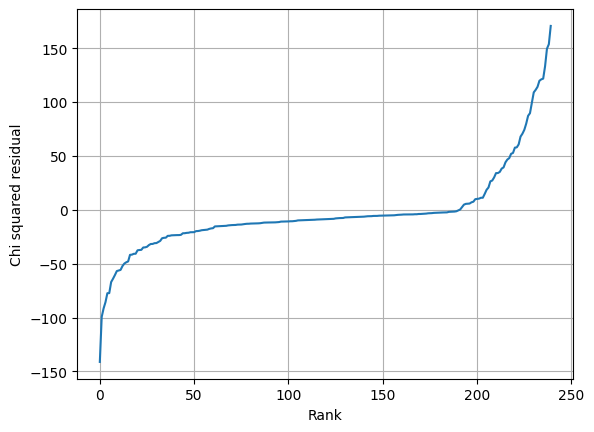

In [13]:
plt.grid(True)
plt.xlabel("Rank")
plt.ylabel("Chi squared residual")
plt.plot(np.sort(long["chi2_resid"]))

## Multiple Correspondence Analysis

Multiple Correspondence Analysis (MCA) is a type of factor analysis for categorical data. A common use of MCA is to produce biplots that can be used to visualize the joint distribution of several categorical variables. Here we use MCA to understand the relationships among the contingency table of characteristics of the subjects in the BHHT data.

Below we fit factors to the data using multiple correspondence analysis (MCA).

In [14]:
mca = prince.MCA(n_components=4)
mca = mca.fit(dx)

We can make an interactive plot of the column coordinates (there are too many objects to plot):

In [15]:
mca.plot(dx, show_row_markers=False, show_row_labels=False)

alt.LayerChart(...)

We can make a more informative static version of this plot by coloring the levels of the same parent variable in a common color, and by connecting the points that correspond to ordered variables.

In [16]:
cols = {"occ": "orange", "sex": "purple", "reg": "lime", "era": "navy"}

def mca_plot(mca, df, cols, jx, jy):
    cc = mca.column_coordinates(df)
    xmin, xmax = cc.iloc[:, jx].min(), cc.iloc[:, jx].max()
    d = xmax - xmin
    xmin -= 0.1*d
    xmax += 0.1*d
    ymin, ymax = cc.iloc[:, jy].min(), cc.iloc[:, jy].max()
    d = ymax - ymin
    ymin -= 0.1*d
    ymax += 0.1*d

    plt.clf()
    plt.grid(True)
    for k in cols.keys():
        cx = cc[cc.index.str.startswith(k)]
        if k == "era":
            plt.plot(cx.iloc[:, jx], cx.iloc[:, jy], "-", color=cols[k])
        for i in range(cx.shape[0]):
            plt.text(cx.iloc[i, jx], cx.iloc[i, jy], cx.index[i], color=cols[k],
                     ha="center", va="center")
    plt.xlabel("Component %d" % (jx + 1))
    plt.ylabel("Component %d" % (jy + 1))
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

The most informative projection of the columns is spanned by the first two factors, as plotted below:

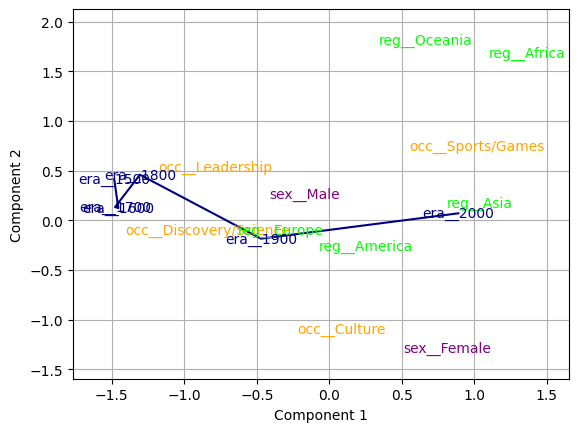

In [17]:
mca_plot(mca, dx, cols, 0, 1)

Recall that the angle between two vectors corresponding to categories of different variables encodes the correlation between the indicators for those variable categories.  This is illustrated by a few examples below.

In [18]:
np.corrcoef(dx.occ=="Culture", dx.sex=="Female")

array([[1.        , 0.17240794],
       [0.17240794, 1.        ]])

In [19]:
np.corrcoef(dx.occ=="Leadership", dx.sex=="Female")

array([[ 1.        , -0.11132951],
       [-0.11132951,  1.        ]])

In [20]:
np.corrcoef(dx.reg=="Oceania", dx.occ=="Sports/Games")

array([[1.        , 0.12993594],
       [0.12993594, 1.        ]])

In [21]:
np.corrcoef(dx.occ=="Leadership", dx.era=="1800")

array([[1.        , 0.20413452],
       [0.20413452, 1.        ]])

Below we plot factors 2 and 3 (these are the third and fourth factors since Python counts from zero).  These capture an independent projection of the data from factors 0 and 1.

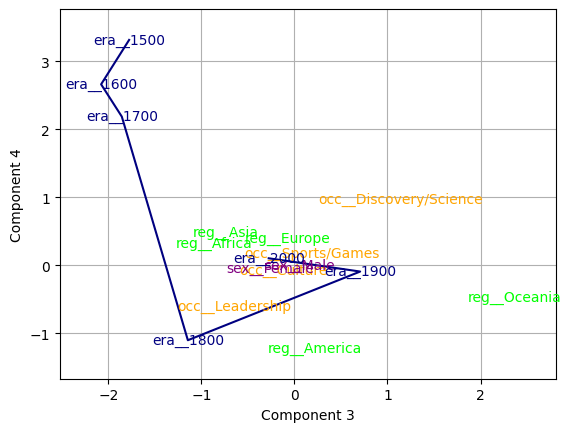

In [22]:
mca_plot(mca, dx, cols, 2, 3)

In an MCA plot, information about the variables is encoded both in the angles between variable scores, and in the magnitudes of the variable scores.  Variables that are uncorrelated with all other variables have very short magnitudes.  To demonstrate this, we create a variable that is independent of the others and include it in the MCA.

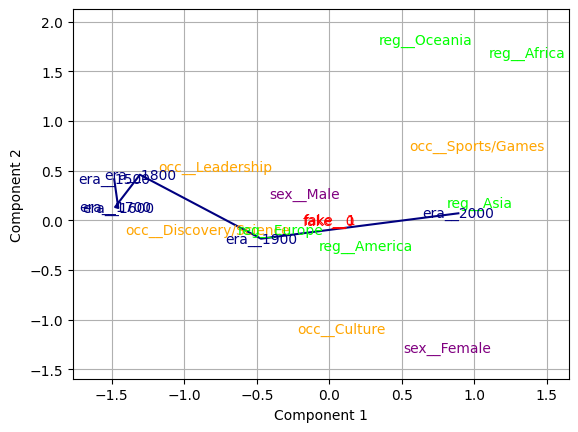

In [23]:
dx1 = dx.copy()
dx1["fake"] = np.random.choice([0, 1], dx.shape[0])
cols1 = cols.copy()
cols1["fake"] = "red"

mca1 = prince.MCA(n_components=4)
mca1 = mca1.fit(dx1)
mca1.transform(dx1)
mca_plot(mca1, dx1, cols1, 0, 1)